In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
!nvidia-smi

Sat Jul 17 16:26:50 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    27W /  70W |    104MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [20]:
import sklearn
import numpy as np
import os
import cv2
from keras.optimizers import SGD, Adam
from keras.applications.vgg16 import VGG16
from keras.models import Sequential, Model
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image


Using TensorFlow backend.


In [ ]:
image_dir="/content/drive/MyDrive/Dataset/data"
dir_lst=os.listdir(image_dir)
# Create empty list to store the image and its corresponding labels
ximages=[]
y=[]
label_id=0
class_map={}
for i in dir_lst:
    class_map_temp={i:label_id}
    class_map.update(class_map_temp)
    print(i)
    for index,item in enumerate(os.listdir(os.path.join(image_dir,i))):
        
        ximages.append(cv2.resize(cv2.imread(os.path.join(image_dir,i,item)),(224,224),interpolation = cv2.INTER_AREA))
        y.append(label_id)
    label_id+=1
print(class_map)

with_mask
without_mask
{'with_mask': 0, 'without_mask': 1}


In [ ]:
y_images=np.array(y)
print(len(ximages))

1376


In [ ]:
base_model=VGG16(weights='imagenet',input_shape=(224,224,3))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

553467904/553467096 [==============================] - 11s 0us/step


In [ ]:
base_model_nolast_layer=VGG16(weights='imagenet',input_shape=(224,224,3),include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
base_model_nolast_layer.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

In [ ]:

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
print(ximages)

[array([[[248, 250, 250],
        [248, 250, 250],
        [248, 250, 250],
        ...,
        [249, 251, 251],
        [249, 251, 251],
        [249, 251, 251]],

       [[248, 250, 250],
        [248, 250, 250],
        [248, 250, 250],
        ...,
        [249, 251, 251],
        [249, 251, 251],
        [249, 251, 251]],

       [[248, 250, 250],
        [248, 250, 250],
        [248, 250, 250],
        ...,
        [249, 251, 251],
        [249, 251, 251],
        [249, 251, 251]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 22,  24,  24],
        [ 21,  23,  23],
        [ 19,  21,  21]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 22,  24,  24],
        [ 21,  23,  23],
        [ 19,  21,  21]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 22,  24,  24],
        [ 21,  23,  23],
        [ 19,  21,  21]

In [ ]:
import time
start = time.time()
features_array = np.zeros((1376,4096))
# extract features from 'fc1' layer from VGG16. 4096 parameters
for i, img_path in enumerate(ximages):
    x = image.img_to_array(img_path)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    features = features.reshape(4096,)
    features_array[i,:] = features
print('Running time to import features from VGG16 model: %.4f seconds' % (time.time()-start))


Running time to import features from VGG16 model: 22.9388 seconds


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import time
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
df = pd.DataFrame(features_array)
# Print the features of first 2 images
print(df.head(2))

   0     1     2     3     4     ...  4091      4092  4093  4094      4095
0   0.0   0.0   0.0   0.0   0.0  ...   0.0  0.000000   0.0   0.0  5.828776
1   0.0   0.0   0.0   0.0   0.0  ...   0.0  2.101377   0.0   0.0  5.595784

[2 rows x 4096 columns]


In [ ]:
# Split images into train and test
Xtrain, Xtest, ytrain, ytest = train_test_split(features_array, y_images, test_size=0.3)

Number of training data with mask: 494 and without mask is:469
Number of test data with mask: 196 and without mask is:217
Number of total training data 963 and total test data is:413


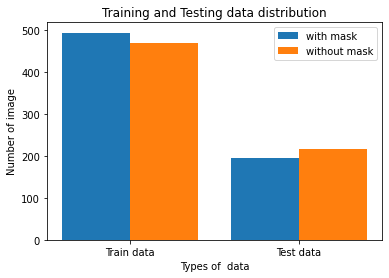

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
w=0.4
x=["Train data","Test data"]
ytrain_lst=ytrain.tolist()
ytest_lst=ytest.tolist()
with_mask=[ytrain_lst.count(0),ytest_lst.count(0)]
without_mask=[ytrain_lst.count(1),ytest_lst.count(1)]
print("Number of training data with mask: {} and without mask is:{}".format(with_mask[0],without_mask[0]))
print("Number of test data with mask: {} and without mask is:{}".format(with_mask[1],without_mask[1]))
print("Number of total training data {} and total test data is:{}".format(len(ytrain_lst),len(ytest_lst)))
bar1=np.arange(len(x))
bar2=[i+w for i in bar1]
plt.bar(bar1,with_mask,w,label="with mask")
plt.bar(bar2,without_mask,w,label="without mask")
plt.xlabel("Types of  data")
plt.ylabel("Number of image")
plt.title("Training and Testing data distribution")
plt.xticks(bar1+w/2,x)
plt.legend()
plt.show()

In [ ]:
# Training and testing svm
start = time.time()
# Train the SVM
svm = SVC()
svm.fit(Xtrain, ytrain)
print('Training time of SVM: %.4f seconds' % (time.time()-start))
preds_svm = svm.predict(Xtest)
preds_svm_train=svm.predict(Xtrain)
# Print the accuracy of Gaussian Naive Bayes
print("The testing accuracy of SVM is : ",accuracy_score(ytest, preds_svm))
print("The training accuracy of SVM is:",accuracy_score(ytrain, preds_svm_train))


In [ ]:
# Training and testing Gaussian Naive Bayes
start_gnb = time.time()
gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)
print('Training time of GNB: %.4f seconds' % (time.time()-start_gnb))
preds_gnb = gnb.predict(Xtest)
preds_gnb_train = gnb.predict(Xtrain)
# Print the accuracy of Gaussian Naive Bayes
print("The testing accuracy of GNB is : ",accuracy_score(ytest, preds_gnb))
print("The training accuracy of GNB is:",accuracy_score(ytrain, preds_gnb_train))


In [ ]:
# Training and testing of decision tree
start_tree=time.time()
clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(Xtrain, ytrain)
print('Training time of decision tree: %.4f seconds' % (time.time()-start_tree))

preds_tree=clf_tree.predict(Xtest)

preds_tree_train=clf_tree.predict(Xtrain)
print("The testing accuracy of decision tree is : ",accuracy_score(ytest, preds_tree))
print("The training accuracy of decision tree is:",accuracy_score(ytrain, preds_tree_train))

In [ ]:
print("Classification report of SVM on test data: \n",classification_report(ytest, preds_svm))

In [ ]:
print("Confusion matrix  of SVM on test data: \n",confusion_matrix(ytest, preds_svm))

In [ ]:
print("Classification report of Gaussian Naive Bayes on test data: \n",classification_report(ytest, preds_gnb))

In [ ]:
print("Confusion matrix  of Gaussian Naive Bayes on test data: \n",confusion_matrix(ytest, preds_gnb))

In [ ]:
print("Classification report of decision tree on test data: \n",classification_report(ytest, preds_tree))

In [ ]:
print("Confusion matrix  of decision tree on test data: \n",confusion_matrix(ytest, preds_tree))